In [93]:
# import time
import os
from skimage import io
import scipy as sp
import numpy as np
# import sys
import openpnm as op
import porespy as ps
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
np.set_printoptions(precision=4)
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math
import pickle

In [38]:
print(op.__version__)

3.4.0


In [39]:
# Matplotlib plotting controls
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')
params = {'figure.autolayout': True,
          'figure.titleweight': 'bold',
          'font.weight': 'bold',
          'font.size': 14,
          'font.family': 'sans-serif',
          'font.sans-serif': 'Arial',
          'legend.fontsize': 12,
#           'legend.title_fontsize':10,
          'figure.figsize': (6, 5),
          'figure.titlesize': 14,
          'axes.labelsize': 12,
          'axes.labelweight': 'bold',
          'axes.titlesize': 14,
          'axes.linewidth': 2,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.top': True,
          'xtick.bottom': True,
          'xtick.labeltop': False,
          'xtick.labelbottom': True,
          'ytick.left': True,
          'ytick.right': True,
          'ytick.labelright': False,
          'ytick.labelleft': True,
          'ytick.major.size': 5.5,
          'ytick.major.width': 0.8,
          'xtick.major.size': 5.5,
          'xtick.major.width': 0.8,
          'ytick.minor.size': 3.5,
          'ytick.minor.width': 0.6,
          'xtick.minor.size': 3.5,
          'xtick.minor.width': 0.6,
        'xtick.minor.visible':True,
         'ytick.minor.visible':True}
rcParams.update(params)

# Step 1: Read in files and prep work

In [87]:
#Read in all tif stacks

voxel_size = 6e-9

numSamples = 3
numRegions = 6

sampleNames = ['pris','uncomp','comp']
regionIndicators = list(range(1,numRegions+1))

im = []

path = 'data/1p2um volumes/'
for i,x in enumerate(sampleNames):
    im_temp = []
    for j,y in enumerate(regionIndicators):
        im_temp.append(io.imread(path+x+'_1p2um/'+x+'_1p2um_'+str(y)+'.tif'))
    im.append(im_temp)
        
#separate solid and void
im_solid = []
im_void = []

for i,x in enumerate(im):
    solid_temp = []
    void_temp = []
    for j, y in enumerate(x):
        solid_temp.append(y != 0)
        void_temp.append(y == 0)
    im_solid.append(solid_temp)
    im_void.append(void_temp)

im_solid = np.array(im_solid)
im_void = np.array(im_void)

im_total = [im_solid, im_void]
im_total = np.array(im_total)

#check
print('im_solid array shape:', im_solid.shape)
print('im_void array shape:',im_void.shape)
print()
print('im_total array shape:',im_total.shape)

im_solid array shape: (3, 6, 200, 200, 200)
im_void array shape: (3, 6, 200, 200, 200)

im_total array shape: (2, 3, 6, 200, 200, 200)


In [41]:
# directions = [['xmin','xmax'],['ymin','ymax'],['zmin','zmax']]

# tort_sims = []
# for b,bin in enumerate(im_total):
#     bin_temp = []
#     for s,sample in enumerate(bin):
#         sample_temp = []
#         for r,region in enumerate(sample):
#             region_temp = []
#             for d, direction in enumerate(directions):
#                 dir_temp = ps.simulations.tortuosity_fd(region,d)
#                 region_temp.append(dir_temp)

#             sample_temp.append(region_temp)
#         bin_temp.append(sample_temp)
#     tort_sims.append(bin_temp)

In [42]:
region=im_total[0][0][0]
test = ps.simulations.tortuosity_fd(region,0)


print(test)
kf = test.effective_porosity/test.tortuosity
print(kf)

[10:49:22] WARNING  Found non-percolating regions, were filled to percolate                              ]8;id=270417;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/porespy/simulations/_dns.py\_dns.py]8;;\:]8;id=923102;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/porespy/simulations/_dns.py#74\74]8;;\

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of tortuosity_fd generated at Thu Sep  4 10:50:10 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im                        Array of size (200, 200, 200)
tortuosity                1.9767240232205079
formation_factor          4.004184061640041
original_porosity         0.4939755
effective_porosity        0.493664625
concentration             Array of size (200, 200, 200)
sys                       (<3949317x3949317 sparse matrix of type '<class 'numpy.float64'>'
	with 26128861 stored elements in COOrdinate format>, array([5.6719, 5.6719, 5.6719, ..., 0.    , 0.    , 0.    ]))
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
0.2497387693987319


In [8]:
# #Run Snow algorithm for pore network extraction 
# #https://porespy.org/modules/generated/generated/porespy.networks.snow2.html#porespy.networks.snow2


# snow_solid = []
# for x in (im_solid):
#     snow_temp = []
#     for y in x:
#         snow_temp.append(ps.networks.snow2(y, accuracy='standard', voxel_size=voxel_size))
#     snow_solid.append(snow_temp)
    
# snow_void = []
# for x in (im_void):
#     snow_temp = []
#     for y in x:
#         snow_temp.append(ps.networks.snow2(y, accuracy='standard', voxel_size=voxel_size))
#     snow_void.append(snow_temp)



In [8]:
# #Store the snow network extractions to save computational time if notebook restarts
%store snow_solid
%store snow_void

Stored 'snow_solid' (list)
Stored 'snow_void' (list)


In [6]:
#Restore the snow network extractions if needed
%store -r snow_solid
%store -r snow_void

In [85]:
# print(snow_solid[0][0].network)

{'throat.conns': array([[   0,    6],
       [   0,   10],
       [   0,   11],
       ...,
       [1285, 1844],
       [1286, 1790],
       [1286, 1903]]), 'pore.coords': array([[5.1828e-08, 8.6965e-08, 3.5738e-08],
       [3.7841e-08, 8.6303e-08, 1.8796e-07],
       [5.1147e-08, 3.2169e-08, 2.6337e-07],
       ...,
       [1.2240e-06, 1.1986e-06, 8.0762e-07],
       [1.2240e-06, 1.2032e-06, 4.6056e-07],
       [1.2240e-06, 1.2120e-06, 9.0000e-08]]), 'pore.all': array([ True,  True,  True, ...,  True,  True,  True]), 'throat.all': array([ True,  True,  True, ...,  True,  True,  True]), 'pore.region_label': array([   1,    2,    3, ..., 1902, 1903, 1904]), 'pore.phase': array([1, 1, 1, ..., 1, 1, 1]), 'throat.phases': array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]]), 'pore.region_volume': array([3.5143e-22, 6.1387e-22, 1.4580e-22, ..., 3.1104e-23, 3.2400e-23,
       1.9440e-24]), 'pore.equivalent_diameter': array([8.7555e-08, 1.0545

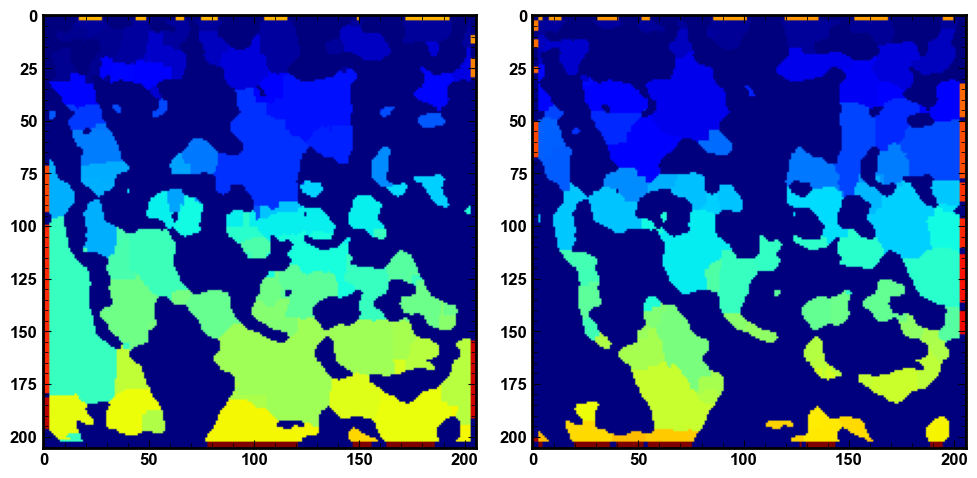

In [92]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10, 5])

ax1.imshow(snow_void[1][0].regions[:,100,:],cmap='jet')
ax2.imshow(snow_solid[1][0].regions[:,100,:],cmap='jet')

In [95]:
snow_solid_networks = [[obj.network for obj in sublist] for sublist in snow_solid]
snow_void_networks = [[obj.network for obj in sublist] for sublist in snow_void]

path = './data/1p2um volumes/'

with open(path+"snow_solid_1p2um_networks.pkl", "wb") as f:
    pickle.dump(snow_solid_networks, f)

with open(path+"snow_void_1p2um_networks.pkl", "wb") as f:
    pickle.dump(snow_void_networks, f)

In [736]:
path = './data/1p2um volumes/'

with open(path+"snow_solid_1p2um_networks.pkl", "rb") as f:
    snow_solid_networks = pickle.load(f)

with open(path+"snow_void_1p2um_networks.pkl", "rb") as f:
    snow_void_networks = pickle.load(f)

In [862]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]



In [863]:
region = pn_total[1][0][0]
# print(region)

In [864]:
op.visualization.plot_notebook(region,
                               node_size=region['pore.extended_diameter'],
                               node_color=region['pore.extended_diameter'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [865]:

h = op.utils.check_network_health(region)
# print(h)

op.topotools.trim(network=region, pores=h['disconnected_pores'])
h = op.utils.check_network_health(region)
# print(h);

# op.visualization.plot_notebook(region,
#                                node_size=region['pore.extended_diameter'],
#                                node_color=region['pore.xmax'],
#                                colormap='jet',
#                                node_scale=2*10**8,
#                                edge_scale=0.0001
#                                )


In [866]:


#type 1

region['pore.diameter'] = region['pore.extended_diameter']
region['throat.diameter'] = region['throat.inscribed_diameter']

print('Pore extended diameter: ', region['pore.extended_diameter'])
print('Pore equivalent diameter: ', region['pore.equivalent_diameter'])
print('Pore inscribed diameter: ', region['pore.inscribed_diameter'])
print()
print('Throat equivalent diameter: ', region['throat.equivalent_diameter'])
print('Throat inscribed diameter: ', region['throat.inscribed_diameter'])
print()

conduit_lengths = op.models.geometry.conduit_lengths.spheres_and_cylinders(region)
# print(conduit_lengths)
region['throat.length'] = conduit_lengths[:,1]
region['pore.volume'] = op.models.geometry.pore_volume.sphere(region,pore_diameter='pore.equivalent_diameter')
region['throat.volume'] = op.models.geometry.throat_volume.cylinder(region,throat_diameter='throat.diameter',throat_length='throat.length')

region['throat.diffusive_size_factors'] = op.models.geometry.diffusive_size_factors.spheres_and_cylinders(region)



#----------------------------------------
#type 2

# region.add_model_collection(op.models.collections.geometry.py 
# region.regenerate_models()


print('Throat length: ', region['throat.length'])
print('Pore volume: ', region['pore.volume'])
print('Throat volume: ', region['throat.volume'])


Pore extended diameter:  [6.0000e-08 1.0461e-07 3.2820e-07 ... 6.9971e-08 4.8000e-08 6.0000e-08]
Pore equivalent diameter:  [3.2472e-08 1.2122e-07 2.7191e-07 ... 3.4437e-08 3.2602e-08 2.5876e-08]
Pore inscribed diameter:  [2.4000e-08 7.9599e-08 1.3200e-07 ... 2.4000e-08 2.4000e-08 1.6971e-08]

Throat equivalent diameter:  [2.2454e-08 1.9149e-08 2.3453e-08 ... 1.5139e-08 1.5139e-08 1.9149e-08]
Throat inscribed diameter:  [2.0785e-08 4.3267e-08 5.0912e-08 ... 3.3941e-08 3.6000e-08 3.3941e-08]

Throat length:  [1.9033e-08 1.0000e-15 1.0000e-15 ... 1.0000e-15 1.0000e-15 1.0000e-15]
Pore volume:  [1.7928e-23 9.3269e-22 1.0526e-20 ... 2.1384e-23 1.8144e-23 9.0720e-24]
Throat volume:  [6.4576e-24 1.4703e-30 2.0358e-30 ... 9.0478e-31 1.0179e-30 9.0478e-31]


In [845]:
#physics
phase = op.phase.Phase(network=region)
phase['pore.diffusivity'] = 1


# phase.add_model_collection(op.models.collections.physics.basic)
region['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase)


In [847]:
for i in conduit_lengths:
    if np.isinf(i).any():
        print(i)

In [848]:
for i in region['throat.diffusive_size_factors']:
    if np.isnan(i).any():
        print(i)

bad = np.isnan(region['throat.diffusive_size_factors']).any(axis=1)   # rows with NaNs
bad_throats = np.where(bad)[0]
print("Bad throats:", bad_throats)
print("Connecting pores:", region['throat.conns'][bad_throats])

tid = bad_throats[0]
pores = region['throat.conns'][tid]
print("pore diameters:", region['pore.diameter'][pores])
print("throat length:", region['throat.length'][tid])

[   nan 1.4703    nan]
Bad throats: [873]
Connecting pores: [[233 336]]
pore diameters: [2.0646e-07 4.9477e-08]
throat length: 1e-15


[3.7525e-08 2.6186e-08 1.0000e-15 ... 3.9651e-08 1.0000e-15 1.0000e-15]
[1.2411e-21 1.2722e-22 4.3200e-23 ... 1.6200e-23 6.0912e-23 2.6568e-23]
[7.2149e-23 1.4808e-23 3.2798e-30 ... 4.4844e-24 1.3572e-30 1.0179e-30]


In [829]:
inlet = region.pores('xmax')
outlet = region.pores('xmin')
Diff = op.algorithms.FickianDiffusion(network=region, phase=phase)
C_in, C_out = [1, 0]
Diff.set_value_BC(pores=inlet, values=C_in)
Diff.set_value_BC(pores=outlet, values=C_out)
Diff.run()

In [830]:
print(Diff)


══════════════════════════════════════════════════════════════════════════════
fick_02 : <openpnm.algorithms.FickianDiffusion at 0x19f8e9e90>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.bc.rate                                                     0 / 1553
  3  pore.bc.value                                                  156 / 1553
  4  pore.concentration                                            1553 / 1553
  5  pore.initial_guess                                            1553 / 1553
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                      

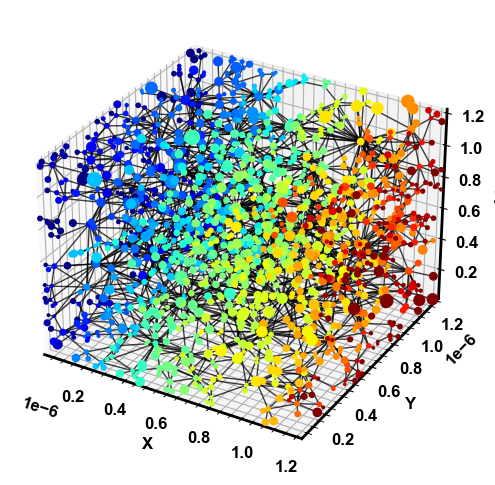

In [831]:
import matplotlib as mpl


fig, ax = plt.subplots(figsize=[5, 5])

colors = Diff['pore.concentration']
op.visualization.plot_connections(ax=ax,
                                network=region,
                                alpha=0.75, linewidth=1,color='k',
                                  )
op.visualization.plot_coordinates(ax=ax,
                                network=region,
                                size_by=region["pore.diameter"],
                                color_by=colors, 
                                markersize=100)


norm = mpl.colors.Normalize(vmin=colors.min(), vmax=colors.max())
sm = mpl.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  # required for matplotlib < 3.6
# plt.axis('off')

# cbar = fig.colorbar(sm,ax=ax)
# cbar.set_label("Concentration")
plt.show()

In [832]:

op.visualization.plot_notebook(region,
                               node_size=region['pore.diameter'],
                               node_color=Diff['pore.concentration'],
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001
                               )

In [833]:
current_directory = os.getcwd()
op.io._vtk.project_to_vtk(region.project,filename=current_directory+'/Paraview_test')

In [834]:
print((region['throat.diffusive_size_factors'][:,1]))

with open("output.txt", "w") as f:
    for item in phase['throat.diffusive_conductance']:
        f.write(str(item) + "\n")

[5.4359e-11 1.5241e-09 5.4178e-10 ... 2.0432e-10 1.8064e-09 7.5379e-10]


In [835]:
# NBVAL_IGNORE_OUTPUT
R = Diff.rate(pores=inlet,mode='group')
print(R)
R = np.sum(R)
print(R)

L = im_total[0][0][0].shape[0]*voxel_size
# area of inlet (and outlet)
A = (im_total[0][0][0].shape[(0+1)%3]*voxel_size)*(im_total[0][0][0].shape[(0+2)%3]*voxel_size)
print(A)
print(L)

D_eff = R * (L) / (A) / (C_in - C_out)
F = D_eff/phase['pore.diffusivity'][0]
print(f'Formation factor is: {F:.4f}')

[1.275e-08]
1.2750140829503753e-08
1.44e-12
1.2e-06
Formation factor is: 0.0106


# Water retention curves

In [321]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [322]:
for s,sample in enumerate(pn_total[1]):
    for r,region in enumerate(sample):
        h = op.utils.check_network_health(region)
        # print(h)

        op.topotools.trim(network=region, pores=h['disconnected_pores'])
        h = op.utils.check_network_health(region)
        region.regenerate_models()
        # print(h)

        region['pore.diameter'] = region['pore.extended_diameter']
        region['throat.diameter'] = region['throat.inscribed_diameter']

        conduit_lengths = op.models.geometry.conduit_lengths.spheres_and_cylinders(region)
        region['throat.length'] = conduit_lengths[:,1]

        region['pore.volume'] = op.models.geometry.pore_volume.sphere(region,pore_diameter='pore.equivalent_diameter')
        region['throat.volume'] = op.models.geometry.throat_volume.cylinder(region,throat_diameter='throat.diameter',throat_length='throat.length')



In [323]:
# print(ps.__version__)
# plt.imshow(im_total[1][0][0][:,100,:])



In [324]:
# test_drain = ps.simulations.drainage(im_total[1][1][0],voxel_size=voxel_size,sigma=0.072,theta=190,bins=100)
# test_imb = ps.simulations.drainage(im_total[1][1][0],voxel_size=voxel_size,sigma=0.072,theta=80,bins=100)



In [325]:
# print(test_sim.pc)
# print(test_sim.snwp)

In [326]:
# fig, ax = plt.subplots(figsize=[5, 5])

# ax.plot(test_drain.pc,(1-np.array(test_drain.snwp)), 'o-')
# ax.plot(test_imb.pc*-1,(np.array(test_imb.snwp)), 'ro-', )

# # ax.invert_xaxis()
# ax.set_xscale('symlog')
# ax.set_xlim(10**4,10**7)


In [ ]:
phases = []       
for s,sample in enumerate(pn_total[1]):
        sample_phases = []
        for r,region in enumerate(sample):
                phase = op.phase.Phase(network=region, name='phase_{}_{}'.format(s,r))
                phase['pore.contact_angle'] =  100  
                phase['pore.surface_tension'] = 0.072
                # phase['throat.contact_angle'] =  80
                # phase['throat.surface_tension'] = 0.0626

                # phase.add_model_collection(op.models.collections.phase.water)
                # phase.add_model_collection(op.models.collections.physics.basic)


                phase.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
                phase.regenerate_models()

                sample_phases.append(phase)
        phases.append(sample_phases)



KeyError: 'throat.diameter'

In [328]:
print(phases[0][0]['throat.contact_angle'])
print(phases[0][0]['throat.surface_tension'])

[100. 100. 100. ... 100. 100. 100.]
[0.072 0.072 0.072 ... 0.072 0.072 0.072]


In [353]:
percs = []
drains = []
for s,sample in enumerate(pn_total[1]):
    sample_percs = []
    sample_drains = []
    for r,region in enumerate(sample):

        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.InvasionPercolation(network=region,phase=phases[s][r]).reset()
        perc = op.algorithms.InvasionPercolation(network=region,phase=phases[s][r],name='perc_{}_{}'.format(s,r))
        perc.set_inlet_BC(pores = used_inlets)
        perc.run()


        inlets = region.pores('ymax')
        used_inlets = [inlets[y] for y in range(0, len(inlets), 1)]
        op.algorithms.Drainage(network=region,phase=phases[s][r]).reset()
        drain = op.algorithms.Drainage(network=region,phase=phases[s][r],name='drain_{}_{}'.format(s,r))
        drain.set_inlet_BC(pores = used_inlets)
        drain.run(pressures=100)

        sample_percs.append(perc)
        sample_drains.append(drain)
    percs.append(sample_percs)
    drains.append(sample_drains)

[14:23:23] WARNING  perc_0_0 is already taken, using perc_0_02 instead                              ]8;id=812419;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=515149;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_0 is already taken, using drain_0_02 instead                            ]8;id=988884;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=67465;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_0_1 is already taken, using perc_0_03 instead                              ]8;id=389354;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=716616;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_1 is already taken, using drain_0_03 instead                            ]8;id=893963;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=824825;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_0_2 is already taken, using perc_0_04 instead                              ]8;id=395512;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=338968;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_2 is already taken, using drain_0_04 instead                            ]8;id=500292;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=79079;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_0_3 is already taken, using perc_0_05 instead                              ]8;id=723306;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=156875;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_3 is already taken, using drain_0_05 instead                            ]8;id=850513;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=814065;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_0_4 is already taken, using perc_0_06 instead                              ]8;id=811047;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=758942;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_4 is already taken, using drain_0_06 instead                            ]8;id=790125;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=871625;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

[14:23:24] WARNING  perc_0_5 is already taken, using perc_0_07 instead                              ]8;id=765824;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=769710;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_0_5 is already taken, using drain_0_07 instead                            ]8;id=680407;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=503143;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_1_0 is already taken, using perc_1_02 instead                              ]8;id=651193;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=987017;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_0 is already taken, using drain_1_02 instead                            ]8;id=398299;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=814408;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_1_1 is already taken, using perc_1_03 instead                              ]8;id=203971;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=651369;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_1 is already taken, using drain_1_03 instead                            ]8;id=90353;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=49804;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_1_2 is already taken, using perc_1_04 instead                              ]8;id=868003;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=453107;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_2 is already taken, using drain_1_04 instead                            ]8;id=708601;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=541539;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_1_3 is already taken, using perc_1_05 instead                              ]8;id=593874;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=509851;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_3 is already taken, using drain_1_05 instead                            ]8;id=356611;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=376565;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

[14:23:25] WARNING  perc_1_4 is already taken, using perc_1_06 instead                              ]8;id=83307;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=463360;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_4 is already taken, using drain_1_06 instead                            ]8;id=546476;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=810536;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_1_5 is already taken, using perc_1_07 instead                              ]8;id=210584;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=971037;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_1_5 is already taken, using drain_1_07 instead                            ]8;id=713591;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=545437;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_2_0 is already taken, using perc_2_02 instead                              ]8;id=450026;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=225596;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_0 is already taken, using drain_2_02 instead                            ]8;id=945136;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=278666;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_2_1 is already taken, using perc_2_03 instead                              ]8;id=348462;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=566701;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_1 is already taken, using drain_2_03 instead                            ]8;id=138712;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=293924;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_2_2 is already taken, using perc_2_04 instead                              ]8;id=76690;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=942950;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_2 is already taken, using drain_2_04 instead                            ]8;id=337166;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=103996;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_2_3 is already taken, using perc_2_05 instead                              ]8;id=39621;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=659193;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_3 is already taken, using drain_2_05 instead                            ]8;id=38980;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=508611;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

[14:23:26] WARNING  perc_2_4 is already taken, using perc_2_06 instead                              ]8;id=579671;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=4907;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_4 is already taken, using drain_2_06 instead                            ]8;id=507079;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=806338;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

           WARNING  perc_2_5 is already taken, using perc_2_07 instead                              ]8;id=616052;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=634854;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

           WARNING  drain_2_5 is already taken, using drain_2_07 instead                            ]8;id=259202;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py\_project.py]8;;\:]8;id=448673;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/utils/_project.py#154\154]8;;\

Performing drainage simulation:   0%|          | 0/100 [00:00<?, ?it/s]

In [354]:
# fig, ax = plt.subplots(figsize=[5, 5])
# op.visualization.plot_coordinates(ax=ax,
#                             network=region,
#                             size_by=region["pore.diameter"],
#                             color_by=perc["pore.bc.inlet"],
#                             markersize=100)

In [388]:
print(drains[0][0])


══════════════════════════════════════════════════════════════════════════════
drain_0_02 : <openpnm.algorithms.Drainage at 0x188dabce0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.invasion_pressure                                        1669 / 1669
  3  throat.invasion_pressure                                      3281 / 3281
  4  pore.invasion_sequence                                        1669 / 1669
  5  throat.invasion_sequence                                      3281 / 3281
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                           

In [399]:
s=1
r=1
fig = op.visualization.plot_notebook(pn_total[1][s][r],
                               node_size=(pn_total[1][s][r])['pore.diameter'],
                               node_color=(drains[s][r])['pore.invasion_pressure']*10**-6,
                               colormap='jet',
                               node_scale=2*10**8,
                               edge_scale=0.0001,

                               )
fig.update_traces(
    marker=dict(
        colorscale='jet',
        colorbar=dict(title='Invasion Pressure [MPa]', thickness=20)
    )
)
fig.show()


In [400]:
perc_pcs = []
perc_sats = []
for s,sample in enumerate(percs):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    perc_pcs.append(sample_pcs)
    perc_sats.append(sample_sats)

In [401]:
drain_pcs = []
drain_sats = []
for s,sample in enumerate(drains):
    sample_pcs = []
    sample_sats = []
    for r,region in enumerate(sample):
        region_pc = []
        region_sat_tot = []

        pc = region.pc_curve().pc
        sat = region.pc_curve().snwp

        region_sat_tot.append(sat[0]) 
        region_pc.append(pc[0])
        for i,x in enumerate(sat):
            if  sat[i] - region_sat_tot[-1] > 0.0:
                region_pc.append(pc[i])
                region_sat_tot.append(sat[i])
        sample_pcs.append(region_pc)
        sample_sats.append(region_sat_tot)
    drain_pcs.append(sample_pcs)
    drain_sats.append(sample_sats)

In [402]:
print(drain_pcs[0][0])
print(len(drain_pcs[0][0]))

[234790.0338980789, 262982.9859827889, 273113.80324099236, 283634.8870327349, 294561.2714824418, 305908.56986975326, 317692.99694014806, 342641.24335445464, 355840.7125466357, 369548.6610603651, 383784.67689700006, 398569.102640788, 413923.06452744873, 429868.50263255043, 446428.2022228233, 463625.8263152188, 481485.94949022424, 500034.0930077569, 519296.7612758274, 539301.4797240654, 560076.8341362356, 581652.5114979605, 604059.3424179903, 627329.3451836739, 651495.7715135526, 676593.1540724686, 702657.3558170951, 729725.621242379, 757836.6296021341, 787030.5501798498, 817349.0996886673, 848835.6018825581, 881535.0494639032, 915494.1683758949, 950761.4845716816, 987387.3933556242, 1025424.2313957639, 1064926.3515104246, 1148554.3989853768, 1192799.826816925, 1238749.7084259603, 1286469.703990759, 1336028.0030976012, 1440945.505714042, 1496454.6313058168, 1740714.496897875, 1877411.7946785507, 2102846.323955118, 2446084.902462384, 2954959.3884533, 4312325.110703262]
51


In [403]:
#log normal std (same for diam or radius)
ln_sigma = np.array([0.6352,0.7396,0.6127])

#log normal mean (diam [nm])
ln_mu_diam = np.array([4.6565,4.9255,4.5715])
dm = np.exp(ln_mu_diam + (ln_sigma**2/2))*10**-9
print('Dm: ', dm)
print('Dm/2: ', dm/2)


ln_mu_rad = np.log(np.exp(ln_mu_diam)/2)
print('ln_mu_rad: ',ln_mu_rad)

rm = np.exp(ln_mu_rad + (ln_sigma**2/2))*10**-9
print('Rm: ',rm)


Dm:  [1.2880e-07 1.8109e-07 1.1665e-07]
Dm/2:  [6.4399e-08 9.0546e-08 5.8326e-08]
ln_mu_rad:  [3.9634 4.2324 3.8784]
Rm:  [6.4399e-08 9.0546e-08 5.8326e-08]


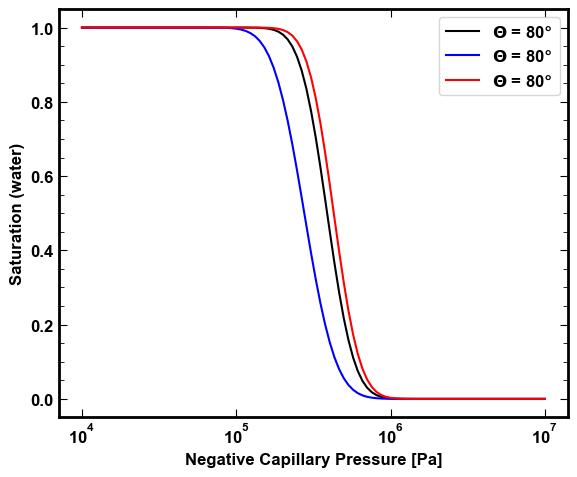

In [404]:

fig, ax = plt.subplots()
colors = ['k','b','r']

pcap = np.logspace(4,7,100)*-1
gamma = 0.072
theta = 80

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    ax.plot(pcap*-1,s,'-',color=colors[i],label='$\Theta$ = {}$\degree$'.format(theta))

# pcap = np.logspace(4,7,100)
# gamma = 0.072
# theta = 100


# for i,sample in enumerate(rm):
#     rk = rm[i]
#     sk = ln_sigma[i]/2
#     rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap
#     x = np.log(rcap/rk)/(sk*np.sqrt(2))
#     s = 0.5*(1+sp.special.erf(x))
#     ax.plot(pcap,s, '--', color=colors[i],label='$\Theta$ = {}$\degree$'.format(theta))


ax.set_xscale('symlog')
# ax.invert_xaxis()
# ax.set_xlim([10**7, 10**4])
# ax.set_ylim([-0.05,1.05])
ax.legend()

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (water)")

plt.show()


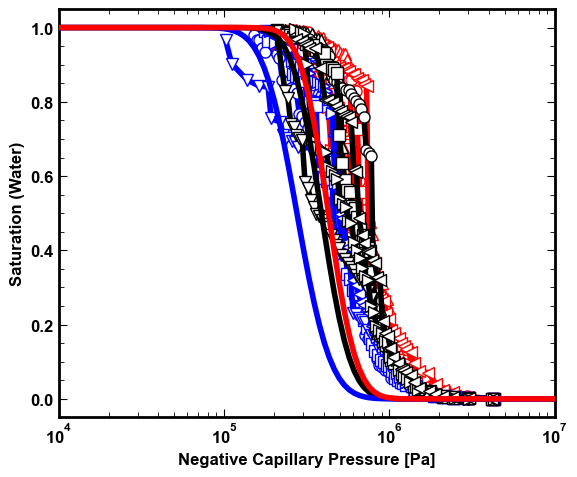

In [868]:
fig, ax = plt.subplots()

line_colors =['k','b','r']
shapes = ['^','o','s','v','>','<']
zorders = [100,99,98]

for s,sample in enumerate(perc_pcs):
    for r,region in enumerate(sample):
        # if s==0 and r==0:
        if True:
            # ax.plot(region,1-np.array(perc_sats[s][r]),color = line_colors[s], marker = shapes[r], 
            #         markeredgewidth=0.5, markerfacecolor='white',zorder=zorders[s])
            ax.plot(drain_pcs[s][r],1-np.array(drain_sats[s][r]),linewidth=4,color = line_colors[s], marker = shapes[r], 
                    markeredgewidth=1,markersize=8, markerfacecolor='white',zorder=zorders[s])
            

pcap = np.logspace(4,7,100)*-1
gamma = 0.072
theta = 80

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    rcap = -2*gamma*np.cos(np.deg2rad(theta))/pcap
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    ax.plot(pcap*-1,s,color=line_colors[i], linewidth=4,zorder=200)

ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
plt.tick_params(axis='x', which='minor')



In [406]:
#interpolation to average water retention curves for each sample across regions

x_interp = []
y_interp = []

x_all = []
f_avg = []

drain_pcs_cut = drain_pcs.copy()
drain_sats_cut = drain_sats.copy()
# del drain_pcs_cut[0][0]
# del drain_sats_cut[0][0]

for s,sample in enumerate(drain_pcs_cut):
    sample_x_data = []
    sample_y_data = []
    sample_x_min_vals = []
    sample_x_max_vals = []
    sample_interp_funcs = []
    for r,region in enumerate(sample):
        sample_x_data.append(region)
        sample_y_data.append(drain_sats_cut[s][r])
        sample_x_max_vals.append(max(region))
        sample_x_min_vals.append(min(region))
        sample_interp_funcs.append(interp1d(region, drain_sats_cut[s][r]))
        
    x_max = math.floor(min(sample_x_max_vals))
    x_min = math.ceil(max(sample_x_min_vals))
    
    # define common carrier for calculation of average curve
    sample_x_all   = np.geomspace(x_min, x_max, num=50)
    
    sample_f_int = []
    for r,region in enumerate(sample):
        # evaluation of fits on common carrier
        sample_f_int.append(sample_interp_funcs[r](sample_x_all))
        
    # put all fits to one matrix for fast mean calculation
    data_collection = np.vstack(sample_f_int)

    # calculating mean value
    sample_f_avg = np.average(data_collection, axis=0)

    x_interp.append(sample_x_data)
    y_interp.append(sample_y_data)
    x_all.append(sample_x_all)
    f_avg.append(sample_f_avg)


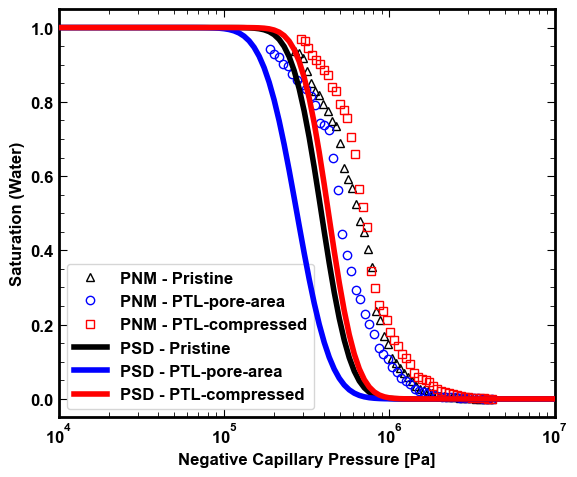

In [407]:
fig, ax = plt.subplots()

line_colors =['k','b','r']
shapes = ['^','o', 's']
labels = ['Pristine','PTL-pore-area','PTL-compressed']

for s,sample in enumerate(f_avg):
    ax.plot(x_all[s],1-np.array(f_avg[s]),' ',color=colors[s], marker=shapes[s], markerfacecolor='none',
            label='PNM - {}'.format(labels[s]))

pcap = np.logspace(4,7,100)*-1
gamma = 0.072
theta = 80

for i,sample in enumerate(rm):
    rk = rm[i]
    sk = ln_sigma[i]/2
    x = np.log(rcap/rk)/(sk*np.sqrt(2))
    s = 0.5*(1+sp.special.erf(x))
    ax.plot(pcap*-1,s,color=line_colors[i], linewidth=4,zorder=200,
            label='PSD - {}'.format(labels[i]))


ax.set_xlabel("Negative Capillary Pressure [Pa]")
ax.set_ylabel("Saturation (Water)")
ax.set_xscale('log')
ax.set_xlim([10**7, 10**4])
ax.invert_xaxis()
ax.legend()
plt.tick_params(axis='x', which='minor')



# Relative Permeability and Diffusivity

## Define helper functions

In [612]:
def sat_update(network, nwp, wp):
    """
        Calculates the saturation of NON-WETTING phase using occupancy information from ordinary percolation.
        Parameters
        ----------
        network: network
        nwp : phase
            non-wetting phase
        wp : phase
            wetting phase
    """
    pore_mask = nwp["pore.occupancy"] == 1
    throat_mask = nwp["throat.occupancy"] == 1
    sat_p = np.sum(network['pore.volume'][pore_mask])
    sat_t = np.sum(network['throat.volume'][throat_mask])
    sat1 = sat_p + sat_t
    bulk = network['pore.volume'].sum() + network['throat.volume'].sum()
    sat = sat1/bulk
    return sat

In [ ]:
def Rate_calc_diff(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    Fd = op.algorithms.FickianDiffusion(network=network, phase=phase)
    Fd.settings._update({'conductance' : conductance})
    Fd.set_value_BC(pores=inlet, values=1)
    Fd.set_value_BC(pores=outlet, values=0)
    Fd.run()
    R = np.abs(Fd.rate(pores=inlet, mode='group'))
    L = 1.2e-6
    A = 1.44e-12
    D_eff = R * (L) / (A) / (1)
    return D_eff

In [665]:
def Rate_calc_perm(network, phase, inlet, outlet, conductance):
    phase.regenerate_models()
    St_p = op.algorithms.StokesFlow(network=network, phase=phase)
    St_p.settings._update({'conductance' : conductance})
    St_p.set_value_BC(pores=inlet, values=1)
    St_p.set_value_BC(pores=outlet, values=0)
    St_p.run()
    R = np.abs(St_p.rate(pores=inlet, mode='group'))
    L = 1.2e-6
    A = 1.44e-12
    K_eff = R * phase['pore.viscosity'][0] * L / A / 1
    return K_eff

## Reinitialize pore networks 

In [794]:
#Create OpenPNM project objects
pn_solid = []
pn_void = []

for x in snow_solid_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_solid.append(pn_temp)
    
for x in snow_void_networks:
    pn_temp = []
    for y in x:
        pn_temp.append(op.io.network_from_porespy(y))
    pn_void.append(pn_temp)
    

pn_total = [pn_solid, pn_void]


In [798]:
# Geometry
for s,sample in enumerate(pn_total[1]):
    for r,region in enumerate(sample):
        h = op.utils.check_network_health(region)
        # print(h)

        op.topotools.trim(network=region, pores=h['disconnected_pores'])
        h = op.utils.check_network_health(region)
        region.regenerate_models()
        # print(h)

        # region.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
        region['pore.diameter'] = region['pore.extended_diameter']
        region['throat.diameter'] = region['throat.inscribed_diameter']

        conduit_lengths = op.models.geometry.conduit_lengths.cones_and_cylinders(region)
        region['throat.length'] = conduit_lengths[:,1]

        region['pore.volume'] = op.models.geometry.pore_volume.sphere(region,pore_diameter='pore.equivalent_diameter')
        region['throat.volume'] = op.models.geometry.throat_volume.cylinder(region,throat_diameter='throat.diameter',throat_length='throat.length')
        region['throat.diffusive_size_factors'] = op.models.geometry.diffusive_size_factors.cones_and_cylinders(region)
        region['throat.hydraulic_size_factors'] = op.models.geometry.hydraulic_size_factors.cones_and_cylinders(region)
        region.regenerate_models()


In [799]:
phases_nw = []
phases_w = []

for s,sample in enumerate(pn_total[1]):
    sample_phases_nw = []
    sample_phases_w = []

    for r,region in enumerate(sample):

        phase_nw = op.phase.Phase(network=region,name='phase_nw_{}_{}'.format(s,r))
        phase_nw['pore.surface_tension'] = 0.072
        phase_nw['pore.contact_angle'] =  100  
        phase_nw.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
        phase_nw['pore.diffusivity'] = 2.4e-9
        phase_nw['pore.viscosity'] = 20.55e-6
        phase_nw['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase_nw)
        phase_nw['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase_nw)
        phase_nw.regenerate_models()


        phase_w = op.phase.Phase(network=region,name='phase_w_{}_{}'.format(s,r))
        phase_w.add_model_collection(op.models.collections.phase.water)
        phase_w['pore.surface_tension'] = 0.072
        phase_w['throat.surface_tension'] = 0.072
        phase_w['pore.contact_angle'] =  80 
        phase_w['throat.contact_angle'] =  80 
        phase_w['pore.diffusivity'] =  1e-9 
        phase_w.regenerate_models()
        phase_w.add_model('throat.entry_pressure',model=op.models.physics.capillary_pressure.washburn)
        phase_w['throat.diffusive_conductance'] = op.models.physics.diffusive_conductance.generic_diffusive(phase_w)
        phase_w['throat.hydraulic_conductance'] = op.models.physics.hydraulic_conductance.generic_hydraulic(phase_w)
        phase_w.regenerate_models()

        sample_phases_nw.append(phase_nw)
        sample_phases_w.append(phase_w)

    phases_nw.append(sample_phases_nw)
    phases_w.append(sample_phases_w)


[17:45:56] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=324519;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=813978;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=120978;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837676;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=477389;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=174438;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=210506;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=619622;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=649573;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=479639;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=335432;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=854394;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=180505;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=345551;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=994903;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=408222;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=448081;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=759447;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=981048;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=197052;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=335300;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=233596;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=338578;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=245351;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=7333;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=400650;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=344630;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=645160;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=626617;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=625092;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=914823;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=602386;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=93801;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=356084;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=424264;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=235661;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=868401;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411608;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=955015;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466583;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:45:57] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=479713;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240186;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=215837;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212928;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=684868;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=937082;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=607903;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=605318;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=879748;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240683;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=1078;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305294;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=162317;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=386141;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=475714;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908239;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=698191;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=907530;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=736081;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=617983;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=789404;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=668309;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=740032;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=261986;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=626283;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=242716;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=655742;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=303723;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=968285;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=786590;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=588643;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=357646;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=322463;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73265;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=32654;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828069;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=609603;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=525850;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=373624;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273794;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=3127;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=425571;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[17:45:58] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=338173;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240784;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=880061;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=156094;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=452338;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=477780;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=548090;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=306700;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=112193;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=239190;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=377517;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=412891;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=367287;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=931398;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=290938;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=700375;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=616802;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=559387;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=348212;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=836066;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=353643;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=600956;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=692581;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=251535;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=74008;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983456;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=778409;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=73138;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=990186;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=61834;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=365726;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=842250;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=145324;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=874237;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=218632;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=744217;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=707011;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=4495;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:45:59] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=801478;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=6242;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=221935;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47395;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=974675;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=128326;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=589965;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=391316;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=886269;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=102796;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=449396;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=956346;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=207927;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=792041;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=810685;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=976538;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=636578;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=790775;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=930786;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=411242;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=838891;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=749146;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=319610;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=341318;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

In [800]:
drains = []

for s,sample in enumerate(pn_total[1]):
    sample_drains = []

    for r,region in enumerate(sample):
        inlet = region.pores('ymin')
        outlet = region.pores('ymax')

        op.algorithms.Drainage(network=region,phase=phases_nw[s][r]).reset()
        drain = op.algorithms.Drainage(network=region, phase=phases_nw[s][r])
     
        drain.set_inlet_BC(inlet)
        drain.run()

        sample_drains.append(drain)
    drains.append(sample_drains)

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [801]:

for s,sample in enumerate(pn_total[1]):

    for r,region in enumerate(sample):
        print(s,r)
        inlet = region.pores('ymin')
        outlet = region.pores('ymax')

        h = op.topotools.is_fully_connected(region)
        print(h)

        diff_sp_nwp = Rate_calc_diff(region, phases_nw[s][r], inlet, outlet, conductance = 'throat.diffusive_conductance')
        diff_sp_wp = Rate_calc_diff(region, phases_w[s][r], inlet, outlet, conductance = 'throat.diffusive_conductance')

        

0 0
True


[17:46:03] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=776683;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=1854;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=585415;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=151640;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

0 1
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=385297;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132736;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=22507;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=288965;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

0 2
True


[17:46:04] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=452327;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=840541;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=384547;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=804688;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

0 3
True


[17:46:08] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=174802;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541896;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=587177;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=999394;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

0 4
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=400878;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=165956;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=873489;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=23043;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

0 5
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=284219;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=817927;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=793095;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=433049;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

1 0
True


[17:46:09] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=337958;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=856237;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=614271;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=873403;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

1 1
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=725055;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364248;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=521957;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=843592;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

1 2
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=336810;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=954632;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=416436;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53980;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

1 3
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=678610;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=803250;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=985241;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=294815;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

1 4
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=19819;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=528286;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=476418;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=963885;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

1 5
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=102950;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=855465;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=145609;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=678535;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

2 0
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=609563;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=924837;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=900333;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=183430;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

2 1
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=386180;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=828727;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=556201;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=102275;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

2 2
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=865320;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983841;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=207811;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766476;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

2 3
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=689061;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=890268;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=395697;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178365;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

2 4
True


[17:46:10] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=458899;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=541504;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=905909;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431061;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

2 5
True


           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=800404;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=395620;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=846992;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=864382;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

In [813]:
s = 0
r = 4
test_region= pn_total[1][s][r]
drn = drains[s][r]
phase_nw = phases_nw[s][r]
phase_w = phases_w[s][r]

inlet = test_region.pores('ymin')
outlet = test_region.pores('ymax')

Snwparr = []

diff_sp_nwp = []
diff_sp_wp = []
reldiff_nwp = []
reldiff_wp = []

perm_sp_nwp = []
perm_sp_wp = []
relperm_nwp = []
relperm_wp = []
for Pc in np.unique(drn['pore.invasion_pressure']):
    phase_nw['pore.occupancy'] = drn['pore.invasion_pressure'] < Pc
    phase_nw['throat.occupancy'] = drn['throat.invasion_pressure'] < Pc
    phase_w['pore.occupancy'] = 1 - phase_nw['pore.occupancy']
    phase_w['throat.occupancy'] = 1 - phase_nw['throat.occupancy']
    phase_nw.regenerate_models()
    phase_w.regenerate_models()
    sat_point = sat_update(test_region,phase_nw,phase_w)
    Snwparr.append(sat_point)

    model_mp_cond = op.models.physics.multiphase.conduit_conductance
    phase_nw.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
                throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
    phase_w.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
                throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
    phase_nw.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
                throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
    phase_w.add_model(model=model_mp_cond, propname='throat.conduit_hydraulic_conductance',
                throat_conductance='throat.hydraulic_conductance', mode='medium', regen_mode='deferred')
    phase_nw.regenerate_models()
    phase_w.regenerate_models()

    Rate_single_nwp = Rate_calc_diff(test_region, phase_nw, inlet, outlet, conductance = 'throat.diffusive_conductance')
    Rate_single_wp = Rate_calc_diff(test_region, phase_w, inlet, outlet, conductance = 'throat.diffusive_conductance')
    Rate_mult_nwp = Rate_calc_diff(test_region, phase_nw, inlet, outlet, conductance = 'throat.conduit_diffusive_conductance')
    Rate_mult_wp = Rate_calc_diff(test_region, phase_w, inlet, outlet, conductance = 'throat.conduit_diffusive_conductance')
    reldiff_nwp.append(Rate_mult_nwp/Rate_single_nwp)
    reldiff_wp.append(Rate_mult_wp/Rate_single_wp)
    diff_sp_nwp.append(Rate_single_nwp)
    diff_sp_wp.append(Rate_single_wp)


    Rate_p_single_nwp = Rate_calc_perm(test_region, phase_nw, inlet, outlet, conductance = 'throat.hydraulic_conductance')
    Rate_p_single_wp = Rate_calc_perm(test_region, phase_w, inlet, outlet, conductance = 'throat.hydraulic_conductance')
    Rate_p_mult_nwp = Rate_calc_perm(test_region, phase_nw, inlet, outlet, conductance = 'throat.conduit_hydraulic_conductance')
    Rate_p_mult_wp = Rate_calc_perm(test_region, phase_w, inlet, outlet, conductance = 'throat.conduit_hydraulic_conductance')
    relperm_nwp.append(Rate_p_mult_nwp/Rate_p_single_nwp)
    relperm_wp.append(Rate_p_mult_wp/Rate_p_single_wp)
    perm_sp_nwp.append(Rate_p_single_nwp)
    perm_sp_wp.append(Rate_p_single_wp)

    



[17:52:14] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=27280;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=903861;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=481161;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=712621;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=402087;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841250;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=765399;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=695374;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=873244;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=606387;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=445654;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892507;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=94394;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=983712;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=41328;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=471537;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=467472;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=884146;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=174725;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=936347;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=892265;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=768217;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=656435;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80553;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=96165;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=53179;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=293170;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=431245;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=132927;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=723456;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=929142;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=240229;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=642937;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=881558;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=880290;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=478462;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=975145;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=707359;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=814633;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=297775;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:52:15] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=233526;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=469380;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=345758;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=246283;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=742731;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=399892;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=822638;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=883226;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=769023;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=449763;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=79825;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=109769;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=415911;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=474868;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=60888;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=109290;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=270825;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=745458;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=324372;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=838030;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=449198;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=566039;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=979866;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=254885;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=610605;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=154097;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=501675;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=485087;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=454632;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=391520;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=451904;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=135397;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=820010;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=58897;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=689844;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=100132;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=178854;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=871772;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=759185;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=62725;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:52:16] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=613895;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=881419;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=591727;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=17181;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=992559;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=175932;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=58514;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=526157;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=596431;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508769;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=699727;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=947181;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=426169;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=780510;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=465262;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=878897;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=12751;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=879787;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=469485;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=143071;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=920912;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=590776;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=982172;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=409664;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=143592;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=479389;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=42244;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=115425;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=283992;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740247;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=196881;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=143301;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=397085;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=214924;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=954349;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=625905;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=482786;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=549174;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=258392;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=772485;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=892144;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=369304;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=260015;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=335327;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=716474;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=623517;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[17:52:17] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=370293;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=246126;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=164089;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=887584;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=226410;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=434163;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=796448;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=288820;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=147856;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=6324;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=341653;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=592421;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=860780;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=795756;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=376535;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=591391;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=781950;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=928431;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=376698;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853965;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=561788;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=847149;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=735131;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=432558;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=131525;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=216592;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=468891;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=918769;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=485807;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=342758;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=74940;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=471286;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=537249;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=63198;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=441911;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=514985;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=715409;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=570900;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=769802;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=509412;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=527260;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=500997;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=884241;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=720021;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[17:52:18] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=394983;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=972371;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=38616;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=487377;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=581058;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=989229;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=385961;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=737485;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=532862;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=638723;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=958700;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=892602;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=778495;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=112100;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=937690;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=178051;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=663210;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=87351;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=125211;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=719072;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=412972;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=71727;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=740612;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=885175;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=536839;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=947038;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=186669;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=181429;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=86726;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=580588;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=106220;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=273872;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=842187;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=703296;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=662574;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=86321;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=764234;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=234794;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=648401;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=491353;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=948089;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=584867;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=958451;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=792415;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=167134;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=906488;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:52:19] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=143983;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=784389;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=693971;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=818670;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=595335;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=786553;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=436434;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=853771;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=540459;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=630736;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=109760;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=410110;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=894849;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=301237;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=852006;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633650;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=359511;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=909152;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=425415;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=244658;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=326171;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213511;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=654625;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816560;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=635262;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=227026;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=229255;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=803547;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=375860;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=740056;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=490717;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=76355;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=611048;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=364021;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=743953;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=110623;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=188552;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=106410;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=671732;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=657;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:52:20] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=11425;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=549302;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=515283;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=711590;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=736835;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=510892;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=198884;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=647910;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=476457;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=822115;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=429351;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=367828;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=838822;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=549230;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=987648;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=816723;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=705487;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=305213;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=674703;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=520424;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=371198;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=74086;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=45021;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=248743;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=575381;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=543117;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=960146;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609842;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=270478;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=133174;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=932463;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=907535;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=697501;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=640562;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=796072;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=29069;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=590867;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=174469;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=351982;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=574556;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=290403;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=526914;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=913818;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=14599;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=689573;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=188282;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=947226;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=61038;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:52:21] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=668141;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=806393;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=494374;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=211621;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=282167;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=963613;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=861584;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=632359;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=754413;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=508732;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=221555;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=499321;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=663109;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=787918;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=663992;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=573741;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=823300;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=829133;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=286649;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=351334;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=869202;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=198613;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=490920;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609988;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=449109;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=284857;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=824982;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=903739;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=67687;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=140472;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=424271;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=843746;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=693432;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=899329;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=306330;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=766706;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=881811;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=642582;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=390809;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=61966;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=270065;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=609594;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=891727;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=882898;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=374530;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=466044;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=860991;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=496645;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:52:22] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=704227;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=493811;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=783928;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=291198;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=856722;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=381228;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=295189;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=691211;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=579882;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=881173;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=626076;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=213159;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=416035;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=360377;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=614815;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=39556;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=768073;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=578123;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=512990;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=421295;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=657374;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=184762;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=596342;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=990643;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=788714;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=231460;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=496835;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=137925;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=929369;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=921055;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=150361;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=698351;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=154062;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=841320;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=124279;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=739765;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=975461;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=47142;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=937106;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=118444;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=217319;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=628936;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=815050;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=8193;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=328609;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=855887;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

[17:52:23] WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=153237;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=21542;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=424912;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=80236;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=178190;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=200057;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=356992;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=506710;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=234044;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=638715;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=303064;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=352160;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=204332;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=462330;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=99101;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=793506;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=418396;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=487186;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=89890;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=207298;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=693811;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=733583;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=438693;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=633925;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=996054;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=192096;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=968302;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=629202;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=508287;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=990655;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=924531;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=922915;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=282075;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=142551;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=222521;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=837299;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=369626;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=765126;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=536484;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=71069;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=971320;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=21828;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

[17:52:24] WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=217261;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=858250;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=850158;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=212362;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=168901;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=908729;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=993758;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=13648;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=600978;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=500057;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=92826;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=658946;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=584352;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=645071;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=693356;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=409463;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=595810;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=601610;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=50103;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=743278;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=411445;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=775316;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=791251;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=691017;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=658992;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=647385;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=74114;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=132892;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=161110;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=437068;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=170825;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=862860;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=811207;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=350738;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=180823;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=845757;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

           WARNING  pore.vapor_pressure was not run since the following property is missing: 'CAS'   ]8;id=434978;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=441736;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\

           WARNING  pore.molar_density was not run since the following property is missing:          ]8;id=584081;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py\_models.py]8;;\:]8;id=242616;file:///Users/karaferner/opt/anaconda3/envs/openpnm34/lib/python3.10/site-packages/openpnm/core/_models.py#480\480]8;;\
                    'molecular_weight'                                                                             

In [814]:
print(perm_sp_nwp[0])
print(perm_sp_wp[0])

print(diff_sp_nwp[0])
print(diff_sp_wp[0])

[8.8651e-17]
[8.8651e-17]
[5.6223e-10]
[2.3426e-10]


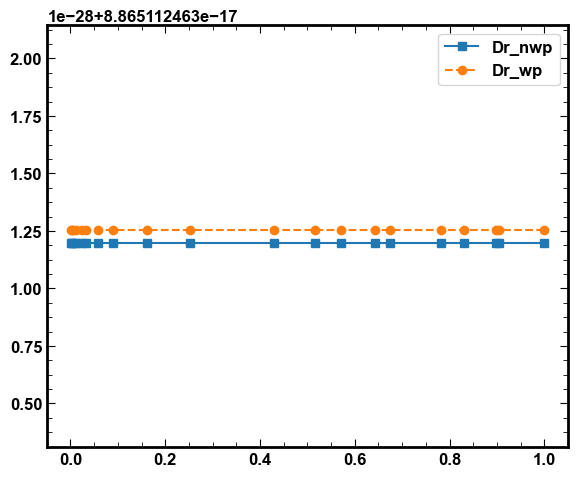

In [815]:
fig, ax = plt.subplots()

ax.plot(1-np.array(Snwparr), perm_sp_nwp, 's-', label='Dr_nwp')
ax.plot(1-np.array(Snwparr), perm_sp_wp, 'o--', label='Dr_wp')
# plt.xlabel('Swp')
# plt.ylabel('Dr')
# plt.title('Relative Diffusivity in x direction')

ax.legend()

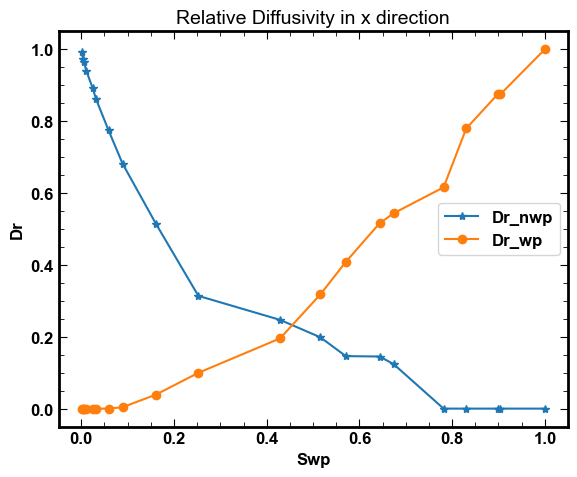

In [816]:
plt.figure(figsize=[6,5])
plt.plot(1-np.array(Snwparr), reldiff_nwp, '*-', label='Dr_nwp')
plt.plot(1-np.array(Snwparr), reldiff_wp, 'o-', label='Dr_wp')
plt.xlabel('Swp')
plt.ylabel('Dr')
plt.title('Relative Diffusivity in x direction')
plt.legend()

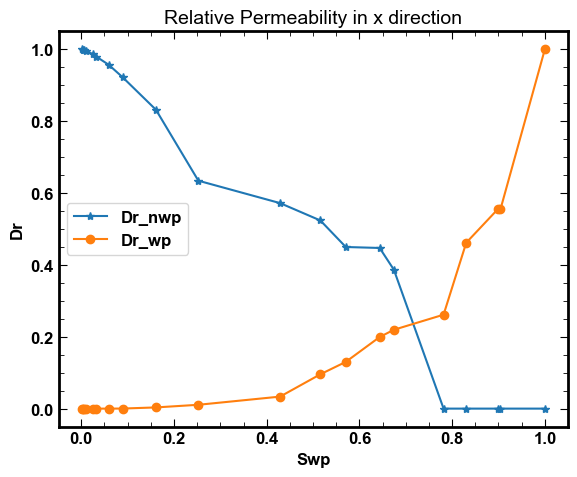

In [817]:
plt.figure(figsize=[6,5])
plt.plot(1-np.array(Snwparr), relperm_nwp, '*-', label='Dr_nwp')
plt.plot(1-np.array(Snwparr), relperm_wp, 'o-', label='Dr_wp')
plt.xlabel('Swp')
plt.ylabel('Dr')
plt.title('Relative Permeability in x direction')
plt.legend()

In [468]:
from thermo import Mixture
pn = op.network.Cubic(shape=[15, 15, 15], spacing=1e-6)
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
# a = Mixture(IDs=['oxygen', 'nitrogen'], zs=[0.21, 0.79])
# air = op.phase.Species(network=pn,species='oxygen',name='air')
# air['pore.surface_tension'] = 0.072
# air['pore.contact_angle'] = 180.0
# air.add_model_collection(op.models.collections.phase.air)
# air.add_model_collection(op.models.collections.physics.basic)
# air.regenerate_models()
water = op.phase.Water(network=pn,name='water')
# water['pore.diffusivity'] = 1e-9
water.add_model_collection(op.models.collections.phase.water)
# water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()

In [469]:
print(water)


══════════════════════════════════════════════════════════════════════════════
water : <openpnm.phase.Water at 0x194a94360>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.temperature                                              3375 / 3375
  3  pore.pressure                                                 3375 / 3375
  4  pore.contact_angle                                            3375 / 3375
  5  pore.density                                                  3375 / 3375
  6  pore.molar_density                                            3375 / 3375
  7  pore.surface_tension                                          3375 / 3375
  8  pore.thermal_conductivity                                     3375 / 3375
  9  pore.vapor_pressure                                           3375 / 3375
 10  p

In [437]:
drn = op.algorithms.Drainage(network=pn, phase=water)
drn.set_inlet_BC(pn.pores('left'))
drn.run()

Performing drainage simulation:   0%|          | 0/25 [00:00<?, ?it/s]

In [438]:

diff_in = pn.pores('left')
diff_out = pn.pores('right')

In [439]:

model_mp_cond = op.models.physics.multiphase.conduit_conductance
air.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')
water.add_model(model=model_mp_cond, propname='throat.conduit_diffusive_conductance',
              throat_conductance='throat.diffusive_conductance', mode='medium', regen_mode='deferred')

In [441]:
def Rate_calc(network, phase, inlet, outlet, conductance):
        phase.regenerate_models()
        Fd = op.algorithms.FickianDiffusion(network=network, phase=phase)
        Fd.settings._update({'conductance' : conductance})
        Fd.set_value_BC(pores=inlet, values=1)
        Fd.set_value_BC(pores=outlet, values=0)
        Fd.run()
        val = np.abs(Fd.rate(pores=inlet, mode='group'))
        return val

In [442]:
Snwparr = []
reldiff_nwp = []
reldiff_wp = []
for Pc in np.unique(drn['pore.invasion_pressure']):
    water['pore.occupancy'] = drn['pore.invasion_pressure'] < Pc
    water['throat.occupancy'] = drn['throat.invasion_pressure'] < Pc
    air['pore.occupancy'] = 1 - water['pore.occupancy']
    air['throat.occupancy'] = 1 - water['throat.occupancy']
    air.regenerate_models()
    water.regenerate_models()
    sat_point = sat_update(pn, water, air)
    Snwparr.append(sat_point)
    Rate_single_nwp = Rate_calc(pn, air, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_single_wp = Rate_calc(pn, water, diff_in, diff_out, conductance = 'throat.diffusive_conductance')
    Rate_mult_nwp = Rate_calc(pn, air, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    Rate_mult_wp = Rate_calc(pn, water, diff_in, diff_out, conductance = 'throat.conduit_diffusive_conductance')
    reldiff_nwp.append(Rate_mult_nwp/Rate_single_nwp)
    reldiff_wp.append(Rate_mult_wp/Rate_single_wp)

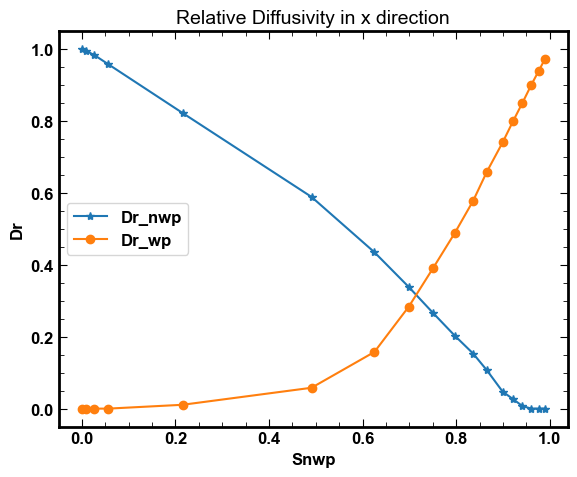

In [443]:
plt.figure(figsize=[6,5])
plt.plot(Snwparr, reldiff_nwp, '*-', label='Dr_nwp')
plt.plot(Snwparr, reldiff_wp, 'o-', label='Dr_wp')
plt.xlabel('Snwp')
plt.ylabel('Dr')
plt.title('Relative Diffusivity in x direction')
plt.legend()